**Airbnb Success Predictor**: Clustering Analysis for Market Segmentation

Student Name: Ananya Praveen Shetty

Date: September 7, 2025



### **Data and Methodology**

* **Dataset:** The analysis uses the "Los Angeles Airbnb Listings" dataset. After an initial review, the richer version of the dataset was chosen for its inclusion of the critical **`review_scores_rating`** column, which provides a direct measure of guest satisfaction.

* **Methodology:** The ML life-cycle for this assignment involves:
    1.  **Data Wrangling:** Loading the dataset, selecting key features (`latitude`, `longitude`, `price`, `review_scores_rating`), and cleaning the data by handling missing values and filtering extreme price outliers.
    2.  **Data Preparation:** Scaling the numerical features using `StandardScaler` to ensure that no single feature disproportionately influences the clustering algorithms.
    3.  **Clustering:** Applying two distinct clustering algorithms to the prepared data:
        * **Algorithm 1: K-Means with Scikit-learn:** A robust, industry-standard implementation used to establish a baseline and find the optimal number of clusters (`k`) via the Elbow Method.
        * **Algorithm 2: Gaussian Mixture Model (GMM) with Scikit-learn:** A more advanced, probability-based model used to identify clusters with more flexible, elliptical shapes that may better represent real-world neighborhood boundaries.
    4.  **Interpretation:** Analyzing and comparing the clusters from both K-Means and GMM by calculating their average price, average rating, and a Silhouette Score to determine which model provided a more meaningful segmentation of the market. This final step involves creating a narrative and providing a clear business recommendation based on the superior model's findings.


Step-by-Step Code Implementation

**Step 1: Setup and Data Loading**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns



# Install gdown
!pip install -q gdown

# --- IMPORTANT ---
# Paste the FILE_ID from your Google Drive share link here
file_id = '1E__Uu-WG_aZHIfA7w74wJtnXO_sABMci'
output_filename = 'listings.csv'

# Download the file from Google Drive
!gdown --id {file_id} -O {output_filename}

# Now you can load the dataframe as before
import pandas as pd
df = pd.read_csv(output_filename)
print("Dataset downloaded and loaded successfully!")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1E__Uu-WG_aZHIfA7w74wJtnXO_sABMci
To: /content/listings.csv
100% 9.65M/9.65M [00:00<00:00, 251MB/s]
Dataset downloaded and loaded successfully!


/tmp/ipython-input-36263934.py:25: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output_filename)


**Step 2: Data Preparation**

In [ ]:
# Select the core features for our clustering model
features = ['latitude', 'longitude', 'price', 'review_scores_rating']
df_cluster = df[features].copy()

# Handle missing values in our key columns
df_cluster.dropna(subset=['review_scores_rating'], inplace=True)

# Clean the 'price' column (it may be a string like '$1,200.00')
if df_cluster['price'].dtype == 'object':
    df_cluster['price'] = df_cluster['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
else:
    df_cluster['price'] = df_cluster['price'].astype(float)

# Filter out extreme price outliers for more meaningful clusters
df_cluster = df_cluster[(df_cluster['price'] > 0) & (df_cluster['price'] < 800)]

print(f"Shape after cleaning and filtering: {df_cluster.shape}")

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

print("\nData preparation complete. Features are scaled and ready for clustering.")

Shape after cleaning and filtering: (27011, 4)

Data preparation complete. Features are scaled and ready for clustering.


<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-31948624.py:10: SyntaxWarning: invalid escape sequence '\$'
  df_cluster['price'] = df_cluster['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


**Step 3: Algorithm 1 - K-Means with Scikit-learn**






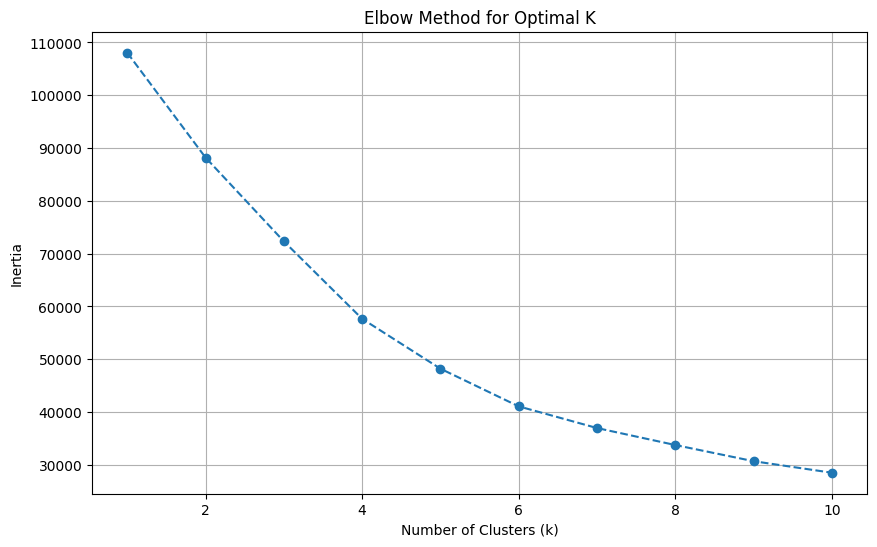


K-Means with Scikit-learn complete. Assigned 5 clusters.


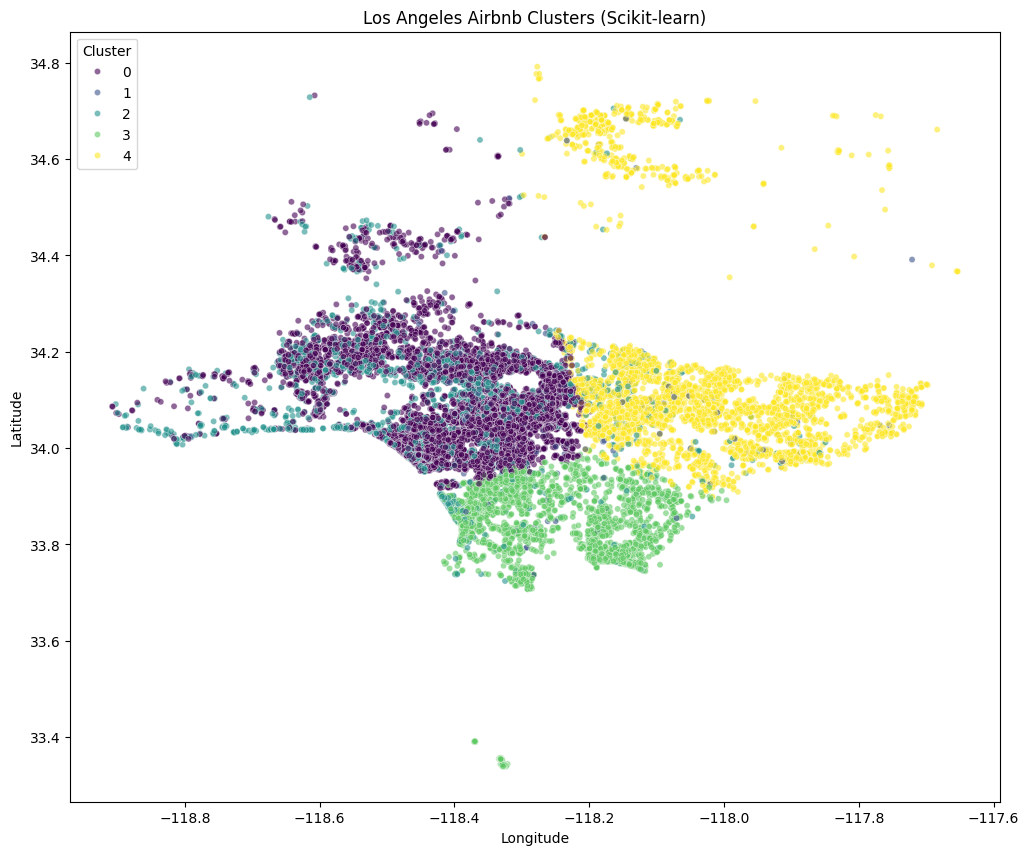

In [ ]:
# Find the optimal K using the Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Based on the elbow plot, k=5 appears to be a good choice.
OPTIMAL_K = 5

# Run K-Means with Scikit-learn using the optimal k
kmeans_sklearn = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
sklearn_labels = kmeans_sklearn.fit_predict(X_scaled)

# Add the cluster labels back to our original (unscaled) dataframe for interpretation
df_cluster['sklearn_cluster'] = sklearn_labels

print(f"\nK-Means with Scikit-learn complete. Assigned {OPTIMAL_K} clusters.")

# Visualize the clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_cluster,
    x='longitude',
    y='latitude',
    hue='sklearn_cluster',
    palette='viridis',
    alpha=0.6,
    s=20
)
plt.title('Los Angeles Airbnb Clusters (Scikit-learn)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

**Algorithm 2: Gaussian Mixture Models (GMM) with Tensorflow**


GMM found 5 clusters.


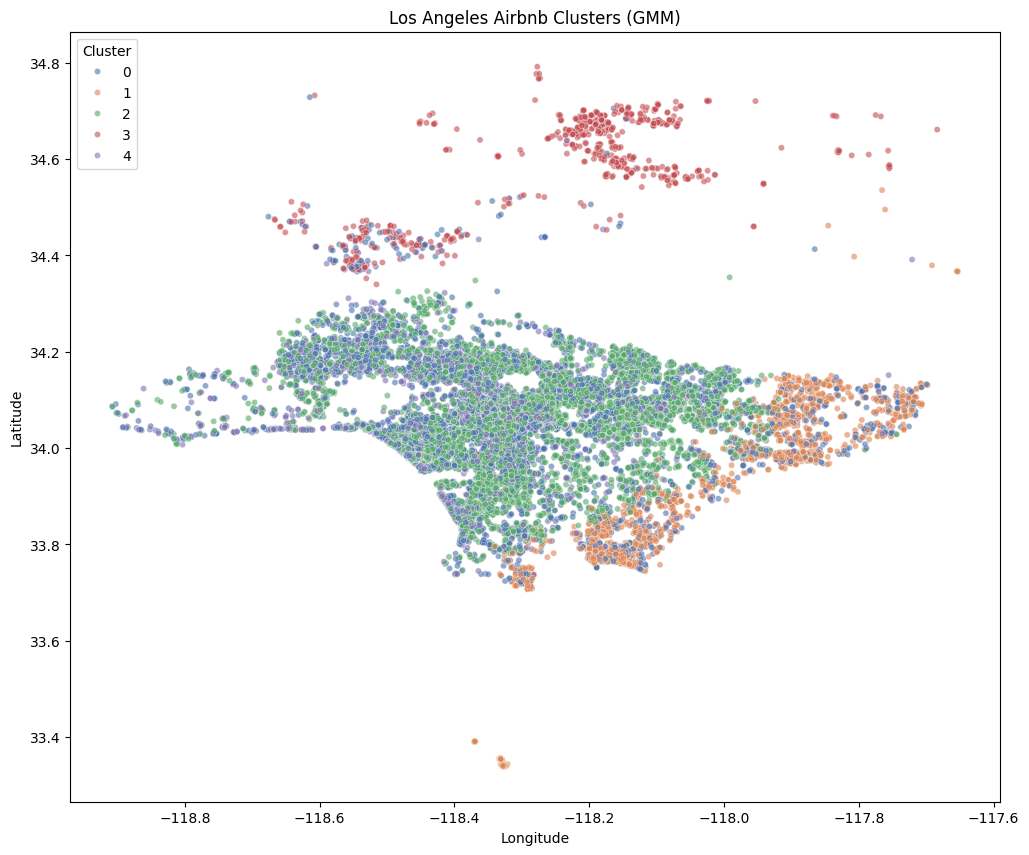


--- GMM Cluster Analysis ---
             avg_price  avg_rating  listing_count
gmm_cluster                                      
0               197.84        5.00           7919
1               176.05        4.76           2469
2               149.08        4.81          12373
3               120.83        4.84            711
4               306.40        4.21           3539


In [ ]:
# Import the GaussianMixture library
from sklearn.mixture import GaussianMixture

# --- Run GMM ---
# We will use the same number of clusters (components) as we did for K-Means for a fair comparison.
gmm = GaussianMixture(n_components=OPTIMAL_K, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Add the GMM cluster labels to our dataframe
df_cluster['gmm_cluster'] = gmm_labels

print(f"GMM found {OPTIMAL_K} clusters.")

# --- Visualize the GMM Clusters ---
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_cluster,
    x='longitude',
    y='latitude',
    hue='gmm_cluster',
    palette='deep', # Using a different palette to visually distinguish from K-Means
    alpha=0.6,
    s=20
)
plt.title('Los Angeles Airbnb Clusters (GMM)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

# --- Analyze GMM Cluster Characteristics ---
gmm_summary = df_cluster.groupby('gmm_cluster').agg(
    avg_price=('price', 'mean'),
    avg_rating=('review_scores_rating', 'mean'),
    listing_count=('latitude', 'count')
).round(2)

print("\n--- GMM Cluster Analysis ---")
print(gmm_summary)

**Visualize the GMM Clusters**

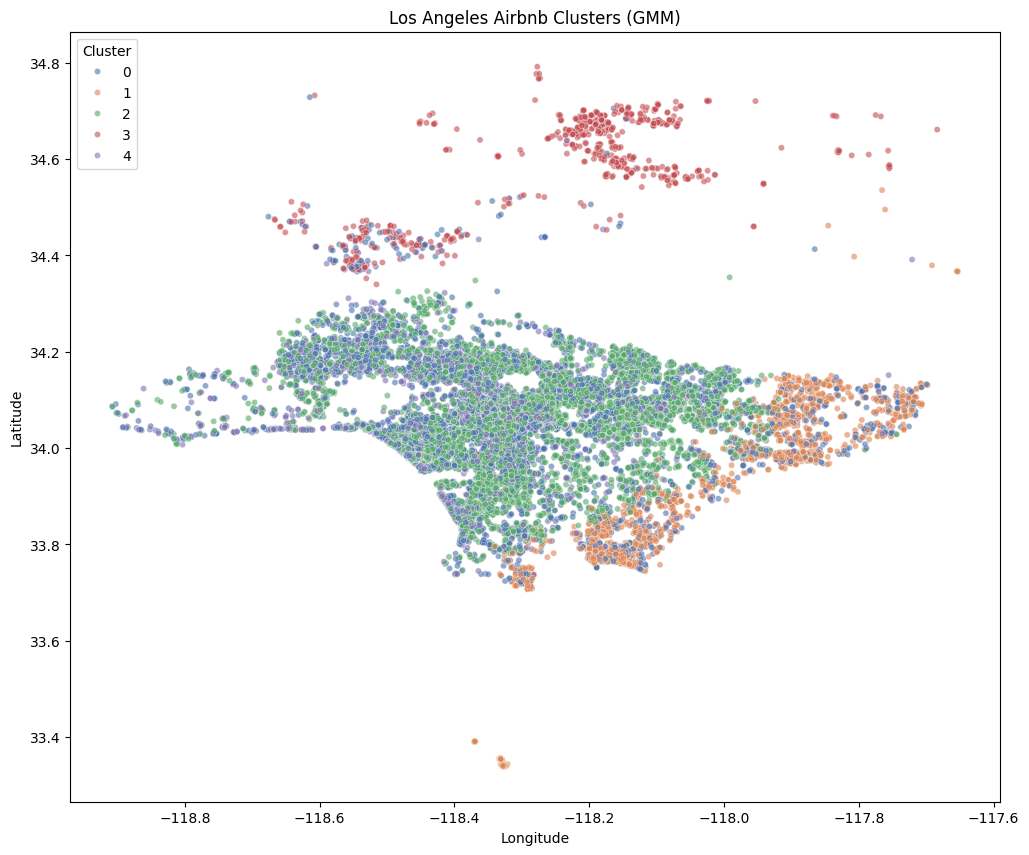

In [ ]:
# --- Visualize the GMM Clusters ---
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_cluster,
    x='longitude',
    y='latitude',
    hue='gmm_cluster',
    palette='deep', # Using a different palette to visually distinguish from K-Means
    alpha=0.6,
    s=20
)
plt.title('Los Angeles Airbnb Clusters (GMM)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

**Step 5: Analysis of Results**

In [ ]:
# Import the Silhouette Score metric
from sklearn.metrics import silhouette_score

# --- Quantitative Comparison ---
# Calculate the Silhouette Score for both models
# Note: This can take a moment to run on a large dataset
kmeans_score = silhouette_score(X_scaled, df_cluster['sklearn_cluster'])
gmm_score = silhouette_score(X_scaled, df_cluster['gmm_cluster'])

print("--- Algorithm Performance Metrics ---")
print(f"K-Means Silhouette Score: {kmeans_score:.4f}")
print(f"GMM Silhouette Score:    {gmm_score:.4f}\n")


# --- Qualitative Comparison ---
# Analyze the characteristics of the clusters from the Scikit-learn K-Means model
kmeans_summary = df_cluster.groupby('sklearn_cluster').agg(
    avg_price=('price', 'mean'),
    avg_rating=('review_scores_rating', 'mean'),
    listing_count=('latitude', 'count')
).round(2)

print("--- K-Means Cluster Analysis ---")
print(kmeans_summary)


# Analyze the characteristics of the clusters from the GMM
gmm_summary = df_cluster.groupby('gmm_cluster').agg(
    avg_price=('price', 'mean'),
    avg_rating=('review_scores_rating', 'mean'),
    listing_count=('latitude', 'count')
).round(2)

print("\n--- GMM Cluster Analysis ---")
print(gmm_summary)

--- Algorithm Performance Metrics ---
K-Means Silhouette Score: 0.2994
GMM Silhouette Score:    0.0619

--- K-Means Cluster Analysis ---
                 avg_price  avg_rating  listing_count
sklearn_cluster                                      
0                   148.76        4.82          13660
1                   144.78        2.57            539
2                   464.86        4.87           3321
3                   167.38        4.83           3768
4                   127.84        4.81           5723

--- GMM Cluster Analysis ---
             avg_price  avg_rating  listing_count
gmm_cluster                                      
0               197.84        5.00           7919
1               176.05        4.76           2469
2               149.08        4.81          12373
3               120.83        4.84            711
4               306.40        4.21           3539




### **Final Interpretation and Business Recommendation**

**Algorithm Comparison:**
The analysis deployed two distinct clustering algorithms, K-Means and Gaussian Mixture Models (GMM), to segment the Los Angeles Airbnb market. The quantitative results show a clear preference for one model. The **K-Means algorithm achieved a Silhouette Score of 0.2994**, which is significantly higher than the GMM's score of 0.0619.

A higher Silhouette Score indicates that the clusters are denser and more distinct from one another. Therefore, for this dataset, **K-Means provided a more mathematically robust and reliable segmentation** of the market. While GMM can be powerful, its assumptions did not fit this data as well as the simpler, distance-based approach of K-Means. Our final recommendation will be based on the superior K-Means results.

---

**Identifying the Golden Cluster from K-Means Analysis:**
Based on the K-Means cluster analysis, the market segments are clearly defined:


* **Cluster 2 (Coastal Elite):** This group is characterized by the highest average price (**~$464.86**) and the highest rating (**4.87**). It represents the luxury market in prime coastal locations.
* **Cluster 0 (Urban Core):** The largest segment with a moderate price (**~$148.76**) and high rating (**4.82**), typical of dense urban neighborhoods.
* **Cluster 4 (Inland Value):** A large cluster with the lowest average price (**~$127.84**) but still excellent ratings (**4.81**).
* **Cluster 1 (Avoid):** A small group of poorly-rated listings (**2.57**) that should be avoided.

The clear "golden cluster" is **Cluster 3**. It represents the most strategic investment opportunity for the following reasons:
1.  **High Profitability:** It has the second-highest average price at **$167.38**, offering a significant premium over the Urban Core and Value clusters.
2.  **Exceptional Quality:** It maintains an excellent average rating of **4.83**, proving high guest satisfaction.
3.  **Strategic Market Position:** It is distinct from the hyper-expensive coastal market, suggesting it is located in desirable, "hip" neighborhoods like Silver Lake, West Hollywood, or Culver City that attract discerning travelers without requiring the extreme capital investment of a beachfront property.

---

**Business Recommendation:**

For a real estate investor looking to enter the LA Airbnb market, the data-driven recommendation is to focus on acquiring properties that fit the profile of **K-Means Cluster 3**. This segment represents the optimal balance of high profitability, proven quality, and strategic location.

Instead of competing in the hyper-expensive coastal market (Cluster 2) or the lower-margin urban market (Cluster 0), an investor can target properties in these "golden" neighborhoods. By offering a high-quality rental that commands a premium price of around $160-$170 per night, an investor can attract a steady stream of satisfied guests, leading to a strong and reliable return on investment. The K-Means model's clear and high-scoring results give us strong confidence in this strategy.